# Integrating Embeddings with Queries in an Information Retrieval System

## Objective

In this exercise, we will learn how to integrate embeddings with a query to enhance an Information Retrieval (IR) system. We will use both static and contextual embeddings to generate representations of queries and documents, compute their similarities, and rank the documents based on relevance to the query.

---

## Stages Covered

1. **Introduction to Pre-trained Transformer Models**
   - Load and use BERT for contextual embeddings.
   - Load and use Word2Vec for static embeddings.

2. **Generating Text Embeddings**
   - Generate embeddings for queries and documents using BERT.
   - Generate embeddings for queries and documents using Word2Vec.

3. **Computing Similarity Between Embeddings**
   - Compute cosine similarity between query and document embeddings.
   - Rank documents based on similarity scores.

4. **Integrating Embeddings with Queries**
   - Practical implementation of embedding-based retrieval for a given text corpus.

---

## Prerequisites

- TensorFlow
- Hugging Face's Transformers library
- Gensim library
- Scikit-learn library
- A text corpus in the `../data` folder

---

## Exercise

Follow the steps below to integrate embeddings with a query and enhance your IR system.



Step 0: Verify requirements:

* tensorflow
* transformers
* scikit-learn
* matplotlib
* seaborn

Step 1: Download dataset from Kaggle

URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [2]:
import pandas as pd

wine_df = pd.read_csv('data/winemag-data_first150k.csv')
print(wine_df.head())
corpus = wine_df['description']

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

In [3]:
wine_df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Step 2: Load a Pre-trained Transformer Model

Use the BERT model for generating contextual embeddings and Word2Vec for static embeddings.

In [4]:
import tensorflow as tf
import gensim.downloader as api
from transformers import BertTokenizer, TFBertModel

/Users/pabloarcos/.pyenv/versions/3.8.10/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from gensim.models import KeyedVectors

model_path = 'data/GoogleNews-vectors-negative300.bin.gz'

# Cargar el modelo Word2Vec preentrenado
word2vec_model = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [6]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Step 3: Generate Text Embeddings

Static Embeddings with Word2Vec

In [7]:
import numpy as np

def generate_word2vec_embeddings(texts):
    embeddings = []
    for text in texts:
        tokens = text.lower().split()
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return np.array(embeddings)

word2vec_embeddings = generate_word2vec_embeddings(corpus[:10])
print("Word2Vec Embeddings:", word2vec_embeddings)
print("Word2Vec Shape:", word2vec_embeddings.shape)

Word2Vec Embeddings: [[ 0.01978664  0.03414721 -0.00884628 ... -0.01573336  0.06626587
  -0.02784729]
 [ 0.0016861  -0.00124741 -0.00065494 ... -0.04453754  0.06408358
   0.03221512]
 [-0.01758194  0.06408924  0.02408564 ... -0.04092503  0.09110224
   0.01769352]
 ...
 [ 0.02863665  0.00169689 -0.00209213 ... -0.05629005  0.11204083
   0.03335422]
 [ 0.03364817  0.00603784 -0.03152262 ... -0.0193573   0.12829183
  -0.00842387]
 [ 0.01875126  0.03864291  0.00552817 ... -0.07643094  0.06591528
   0.01740489]]
Word2Vec Shape: (10, 300)


Contextual Embeddings with BERT

In [8]:
def generate_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])  # Use [CLS] token representation
    return np.array(embeddings).transpose(0,2,1)

bert_embeddings = generate_bert_embeddings(corpus[:10])
print("BERT Embeddings:", bert_embeddings)
print("Word2Vec Shape:", bert_embeddings.shape)

BERT Embeddings: [[[ 0.11967489]
  [-0.48856735]
  [ 0.3645301 ]
  ...
  [-0.43680516]
  [ 0.1197608 ]
  [ 0.18947844]]

 [[-0.05186677]
  [-0.36506552]
  [ 0.64745986]
  ...
  [-0.31474513]
  [ 0.05560053]
  [ 0.5154335 ]]

 [[-0.7317317 ]
  [ 0.3508853 ]
  [-0.01913854]
  ...
  [-0.03388382]
  [ 0.22656593]
  [ 0.30798098]]

 ...

 [[-0.35893524]
  [-0.5862951 ]
  [ 0.41342103]
  ...
  [-0.16299404]
  [ 0.33213353]
  [ 0.49520764]]

 [[-0.06120773]
  [-0.3186196 ]
  [ 0.66368014]
  ...
  [-0.26011413]
  [ 0.22982565]
  [ 0.49291262]]

 [[-0.7911081 ]
  [-0.3179433 ]
  [ 0.24998935]
  ...
  [-0.42931485]
  [ 0.30838823]
  [-0.06678645]]]
Word2Vec Shape: (10, 768, 1)


Step 4: Compute Similarity Between Embeddings

Use the scikit-learn library.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between Word2Vec embeddings
word2vec_similarity = cosine_similarity(word2vec_embeddings)
print("Word2Vec Cosine Similarity:\n", word2vec_similarity)

# Cosine similarity between BERT embeddings
bert_similarity = cosine_similarity(bert_embeddings.reshape(10,768))
print("BERT Cosine Similarity:\n", bert_similarity)

Word2Vec Cosine Similarity:
 [[1.         0.8253629  0.80511177 0.8419133  0.83916086 0.8385457
  0.8216921  0.8248522  0.84638995 0.81403273]
 [0.8253629  1.0000004  0.7915441  0.8704564  0.70442986 0.8919623
  0.8555998  0.9090055  0.82102585 0.8199145 ]
 [0.80511177 0.7915441  0.99999976 0.7813313  0.7663708  0.81088394
  0.7600279  0.7869289  0.7806283  0.8284941 ]
 [0.8419133  0.8704564  0.7813313  0.99999964 0.7388937  0.8769778
  0.8692662  0.86583847 0.8299481  0.8144778 ]
 [0.83916086 0.70442986 0.7663708  0.7388937  0.9999998  0.74084014
  0.72642785 0.7543802  0.84104794 0.73225087]
 [0.8385457  0.8919623  0.81088394 0.8769778  0.74084014 0.9999999
  0.8641035  0.9094128  0.84747785 0.8254895 ]
 [0.8216921  0.8555998  0.7600279  0.8692662  0.72642785 0.8641035
  0.99999976 0.8709891  0.8183166  0.7882398 ]
 [0.8248522  0.9090055  0.7869289  0.86583847 0.7543802  0.9094128
  0.8709891  0.9999997  0.86063915 0.83889043]
 [0.84638995 0.82102585 0.7806283  0.8299481  0.84104794 

Step 5: Compare Contextual and Static Embeddings

Analyze and compare the similarity results from both BERT and Word2Vec embeddings.

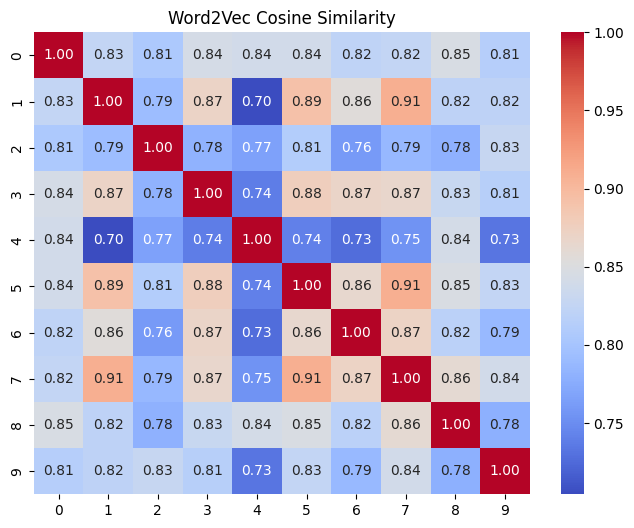

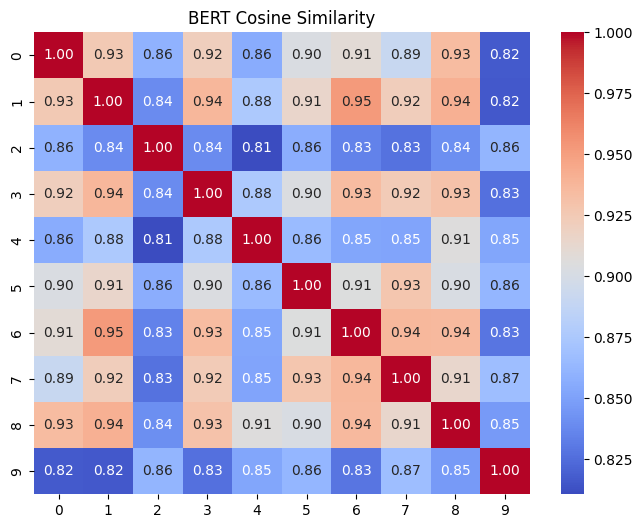

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity, "Word2Vec Cosine Similarity")
plot_similarity_matrix(bert_similarity, "BERT Cosine Similarity")

Step 6: Applying to Corpus

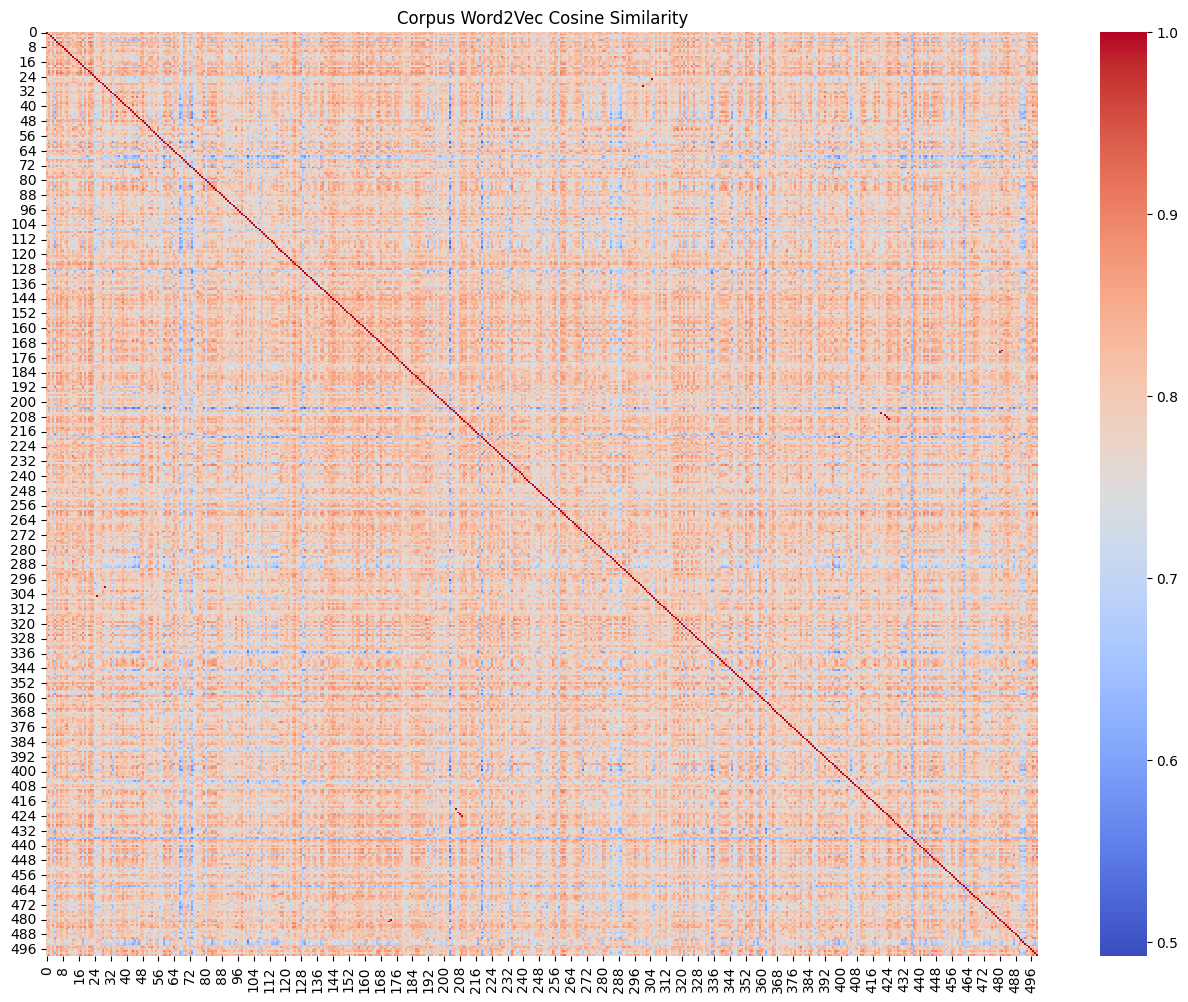

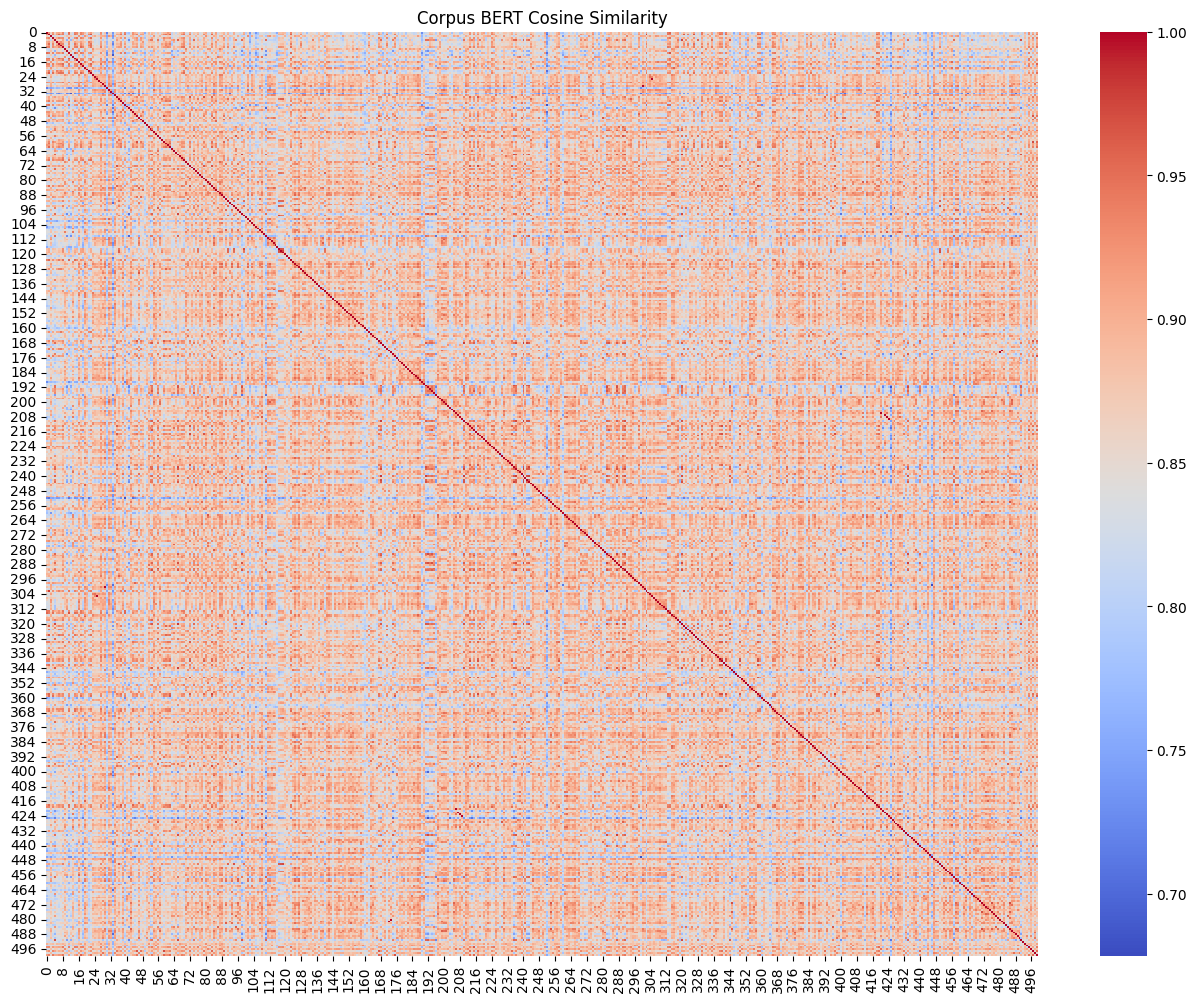

In [11]:
# Generate embeddings for the corpus
corpus_word2vec_embeddings = generate_word2vec_embeddings(corpus[:500])
corpus_bert_embeddings = generate_bert_embeddings(corpus[:500])

# Compute similarity for the corpus
corpus_word2vec_similarity = cosine_similarity(corpus_word2vec_embeddings)
corpus_bert_similarity = cosine_similarity(corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))

# Plot similarity matrices
plot_similarity_matrix(corpus_word2vec_similarity, "Corpus Word2Vec Cosine Similarity", figsize=(16, 12), annotation=False)
plot_similarity_matrix(corpus_bert_similarity, "Corpus BERT Cosine Similarity", figsize=(16, 12), annotation=False)

Summary

So far, in this exercise, you learned how to:

* Load a pre-trained transformer model (BERT) and a static embedding model (Word2Vec).
* Generate text embeddings using these models.
* Compute cosine similarity between embeddings.
* Compare the similarity results from both contextual and static embeddings.

Now you have a practical understanding of how transformers and embeddings can be used in Information Retrieval systems.

Let's integrate query search.

Step 7: Generate Embeddings for the Query

Generate embeddings for the query using the same model used for the documents.

In [12]:
query = 'This tremendous 100% varietal wine hails'

In [13]:
word2vec_embeddings_query = generate_word2vec_embeddings(query)
print("Word2Vec Query Embeddings:", word2vec_embeddings_query)
print("Word2Vec Query Shape:", word2vec_embeddings_query.shape)

Word2Vec Query Embeddings: [[-0.33789062  0.19824219 -0.296875   ... -0.15917969  0.03417969
   0.09179688]
 [-0.28710938  0.29296875 -0.04467773 ... -0.01049805 -0.25976562
   0.11083984]
 [-0.22558594 -0.01953125  0.09082031 ...  0.02819824 -0.17773438
  -0.00604248]
 ...
 [-0.22558594 -0.01953125  0.09082031 ...  0.02819824 -0.17773438
  -0.00604248]
 [-0.02722168  0.23046875 -0.06176758 ... -0.06054688 -0.1953125
   0.11572266]
 [-0.29101562  0.17871094  0.05004883 ... -0.02282715  0.11767578
   0.35351562]]
Word2Vec Query Shape: (40, 300)


In [14]:
bert_embeddings_query = generate_bert_embeddings(query)
print("BERT Query Embeddings:", bert_embeddings_query)
print("Word2Vec Query Shape:", bert_embeddings_query.shape)

BERT Query Embeddings: [[[-0.25475633]
  [-0.07631426]
  [ 0.37731266]
  ...
  [-0.24108677]
  [ 0.2728721 ]
  [ 0.6000002 ]]

 [[-0.56274843]
  [-0.19880082]
  [-0.05238162]
  ...
  [-0.02875061]
  [-0.00357372]
  [ 0.47401398]]

 [[-0.08534051]
  [ 0.17224172]
  [ 0.04252269]
  ...
  [ 0.05077753]
  [ 0.16273186]
  [ 0.07628018]]

 ...

 [[-0.08534051]
  [ 0.17224172]
  [ 0.04252269]
  ...
  [ 0.05077753]
  [ 0.16273186]
  [ 0.07628018]]

 [[-0.44072038]
  [-0.18348064]
  [-0.00161105]
  ...
  [-0.06013437]
  [-0.07051311]
  [ 0.35270995]]

 [[-0.45446125]
  [ 0.05358833]
  [ 0.12024155]
  ...
  [ 0.07028826]
  [ 0.24653077]
  [ 0.41181576]]]
Word2Vec Query Shape: (40, 768, 1)


Step 8: Compute Similarity Between Query and Documents

Compute the similarity between the query embedding and each document embedding.

In [15]:
# Cosine similarity between Word2Vec embeddings
word2vec_similarity_query = cosine_similarity(word2vec_embeddings_query)
print("Word2Vec Query Cosine Similarity:\n", word2vec_similarity_query)

# Cosine similarity between BERT embeddings
bert_similarity_query = cosine_similarity(bert_embeddings_query.reshape(40,768))
print("BERT Query Cosine Similarity:\n", bert_similarity_query)

Word2Vec Query Cosine Similarity:
 [[1.         0.51050071 0.49229356 ... 0.49229356 0.35535728 0.45974122]
 [0.51050071 1.         0.4880949  ... 0.4880949  0.60721075 0.32471689]
 [0.49229356 0.4880949  1.         ... 1.         0.36461019 0.35695546]
 ...
 [0.49229356 0.4880949  1.         ... 1.         0.36461019 0.35695546]
 [0.35535728 0.60721075 0.36461019 ... 0.36461019 1.         0.24024529]
 [0.45974122 0.32471689 0.35695546 ... 0.35695546 0.24024529 1.        ]]
BERT Query Cosine Similarity:
 [[0.99999976 0.9128108  0.8494825  ... 0.8494825  0.88754666 0.923278  ]
 [0.9128108  0.9999999  0.9337634  ... 0.9337634  0.9586367  0.9586116 ]
 [0.8494825  0.9337634  1.         ... 1.         0.94284487 0.952422  ]
 ...
 [0.8494825  0.9337634  1.         ... 1.         0.94284487 0.952422  ]
 [0.88754666 0.9586367  0.94284487 ... 0.94284487 1.0000001  0.95818317]
 [0.923278   0.9586116  0.952422   ... 0.952422   0.95818317 1.0000002 ]]


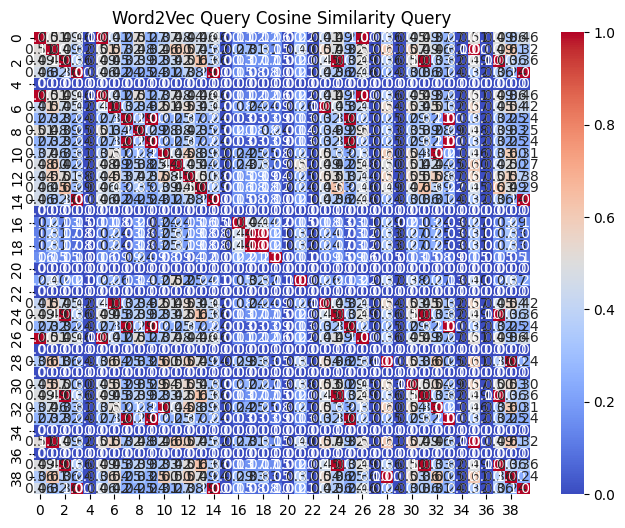

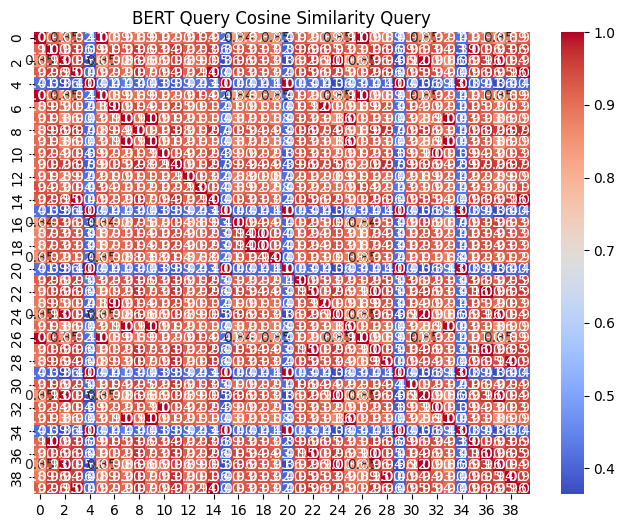

In [16]:
def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity_query, "Word2Vec Query Cosine Similarity Query")
plot_similarity_matrix(bert_similarity_query, "BERT Query Cosine Similarity Query")

In [17]:
# Calcular la similitud coseno entre cada documento y la query
similarities_Word2vec = cosine_similarity(word2vec_embeddings, word2vec_embeddings_query)

# Obtener la similitud promedio por documento
avg_similarities_Word2vec = similarities_Word2vec.mean(axis=1)

In [18]:
# Calcular la similitud coseno entre cada documento y la query
similarities_Bert = cosine_similarity(bert_embeddings.reshape(10,768), bert_embeddings_query.reshape(40,768))

# Obtener la similitud promedio por documento
avg_similarities_Bert = similarities_Bert.mean(axis=1)

Step 9: Retrieve and Rank Documents Based on Similarity Scores

Retrieve and rank the documents based on their similarity scores to the query.

In [19]:
# Crear un ranking de los documentos basado en la similitud promedio
ranking_Word2vect = np.argsort(-avg_similarities_Word2vec)

# Imprimir el ranking de los documentos
print("Ranking de documentos (índices):", ranking_Word2vect)
print("Similitudes de los documentos:", avg_similarities_Word2vec[ranking_Word2vect])


Ranking de documentos (índices): [2 5 8 6 3 4 7 0 1 9]
Similitudes de los documentos: [0.1484178  0.1133149  0.10563358 0.10273233 0.10158501 0.09767718
 0.09264778 0.09187696 0.08405125 0.07549252]


In [20]:
# Crear un ranking de los documentos basado en la similitud promedio
ranking_Bert = np.argsort(-avg_similarities_Bert)

# Imprimir el ranking de los documentos
print("Ranking de documentos (índices):", ranking_Bert)
print("Similitudes de los documentos:", avg_similarities_Bert[ranking_Bert])


Ranking de documentos (índices): [4 2 8 1 0 6 3 9 5 7]
Similitudes de los documentos: [0.6951119 0.6891553 0.6716259 0.6561707 0.6525744 0.6306844 0.6246025
 0.6183084 0.6106741 0.5894614]
